<a href="https://colab.research.google.com/github/Carhuacusma/CC61_PDI_Trabajo_Final/blob/main/CC61_PDI_Trabajo_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CC61: Procesamiento de Imágenes
#**Trabajo Final**

Alumnos:
* Galván Díaz, Joaquín Adrían : u201810A.
* Moreno Carhuacusma, Dante Brandon : u201818067

## Objetivos

## Desarrollo

###Importación de librerías

In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io
from google.colab.patches import cv2_imshow

In [ ]:
#No da error en colab pero no funciona el import {simbolo de exclamcion} pip install scikits.audiolab

In [ ]:
#from scikits.audiolab import play

In [20]:
repo = "https://raw.githubusercontent.com/Carhuacusma/CC61_PDI_Trabajo_Final/main/Data/"

In [21]:
ruta = "Fotos/mary_hoja.jpg"
imHoja = io.imread("%s%s"%(repo,ruta))
print(type(imHoja))

<class 'numpy.ndarray'>


In [ ]:
imagen = io.imread("https://media.gettyimages.com/photos/antique-sheet-music-picture-id172207779?s=2048x2048") #..Considerar: io.imread lee en RGB
#.........................................................cv2 imshow es en BGR
plt.imshow(imagen)

In [17]:
def rectificar(imagen):
  #------------------------------------------ 1. Filtros ------------------------------------------|
  if len(imagen.shape) != 2:
    imagen = cv2.cvtColor(imagen,cv2.COLOR_RGB2GRAY) #................... Asegura Escala de Grises |
  imagen = cv2.bilateralFilter(imagen,d=3,sigmaColor=75,sigmaSpace=30) # .................... Blur |
  im_canny = cv2.Canny(imagen,50,205) #................................. Edge Detector:     Canny |
  #----------------------------------------- 2. Contornos ---------------------------------------- |
  contornos, _ = cv2.findContours(im_canny,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE) #..... Contornos |
  # ******************** Si input es FOTO DE PARTITURA >>> Posible hoja impresa ********************
  #----------------------------------------- 2.1. Extraer la hoja -------------------------------- |
  contornos = sorted(contornos, key = cv2.contourArea, reverse = True) #......... Ordenar por Área |
  contornos = contornos[:int(0.15*len(contornos))] #........................ Solo el 15 % superior |
  hoja = []
  peri = 0
  for c in contornos: #..................................... C pertenece a Contornos: ............ |
    perimetro = cv2.arcLength(c, True) #........................ Perímetro ....................... |
    approx = cv2.approxPolyDP(c, 0.015 * perimetro, True) #..... Disminuir el número de lados de C |
    if len(approx) == 4: #...................................... Si el approx es de 4 lados....... |
      hoja = approx #................................................ Hoja........................ |
      peri = perimetro
      break
  auxIm = imagen.copy()
  cv2.drawContours(auxIm, [hoja], -1, (0, 255, 0), 3)
  cv2_imshow(auxIm)
  return hoja, peri

In [ ]:
print(peri) #Coso tipo L

12457.797235131264


In [19]:
print(peri) #Coso del gettyImages

6108.032735586166


In [ ]:
imagen.shape

(2048, 1527, 3)

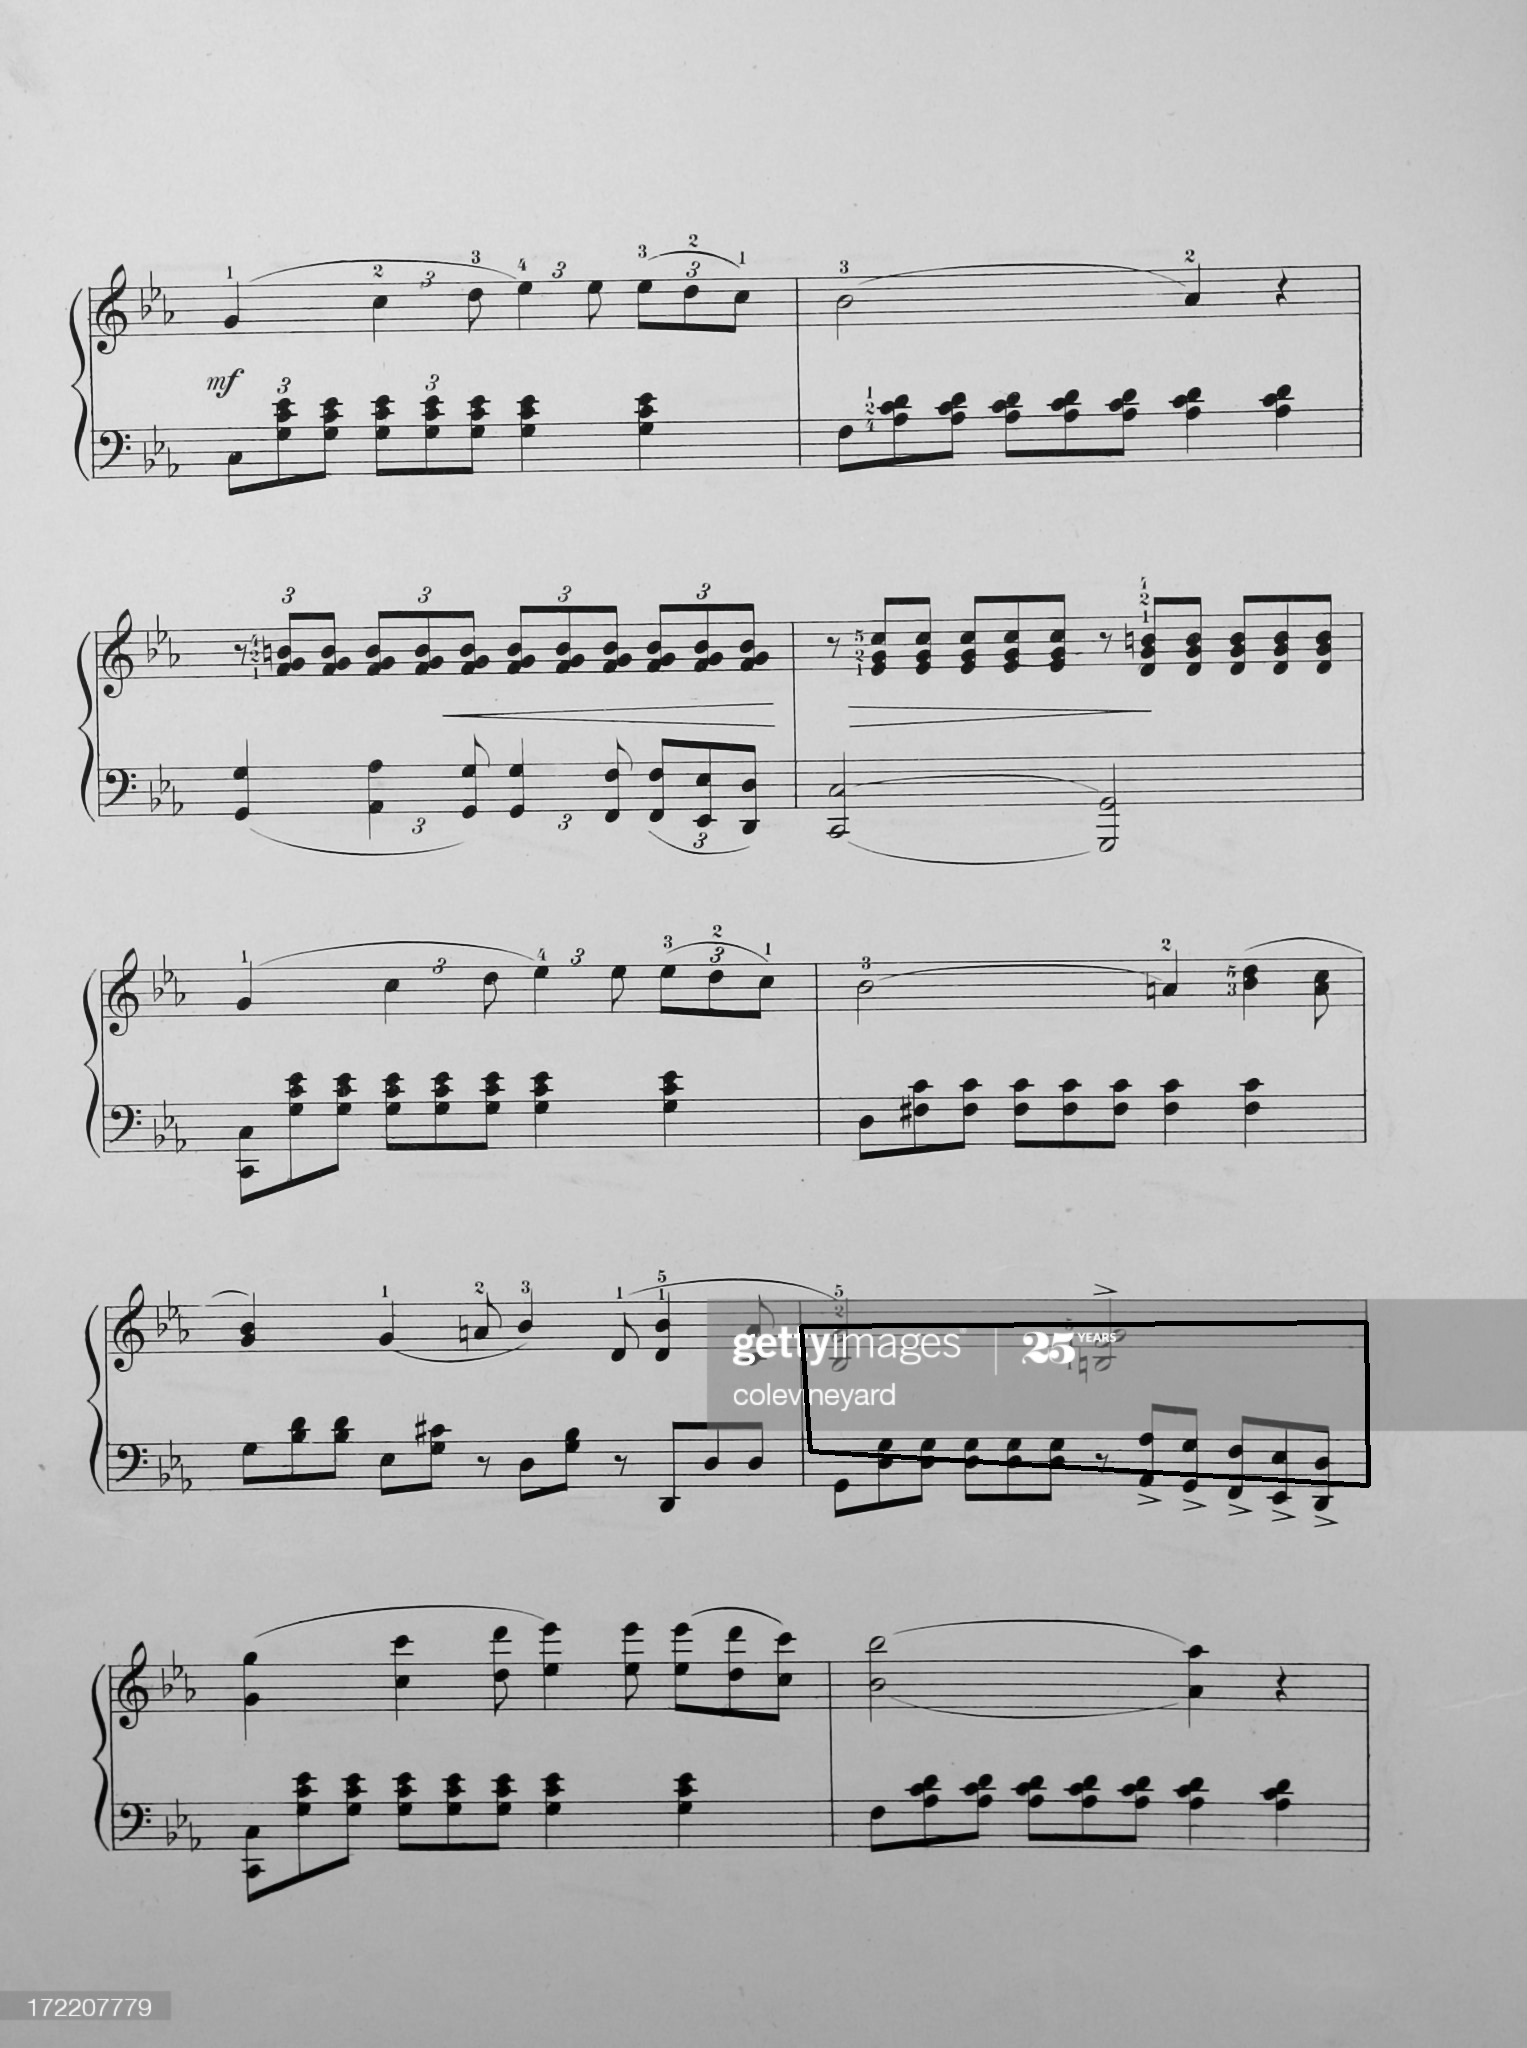

In [18]:
contornos,peri = rectificar(imagen)

In [ ]:
#https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#ga9d7064d478c95d60003cf839430737ed 
#https://docs.opencv.org/master/d4/d13/tutorial_py_filtering.html
#sigmaSpace alto podría terminar borrando detalles y no queremos eso porque líneas
#d=3 porque tampoco queremos un blur tan fuerte
imagen = cv2.bilateralFilter(imagen,d=3,sigmaColor=75,sigmaSpace=30)

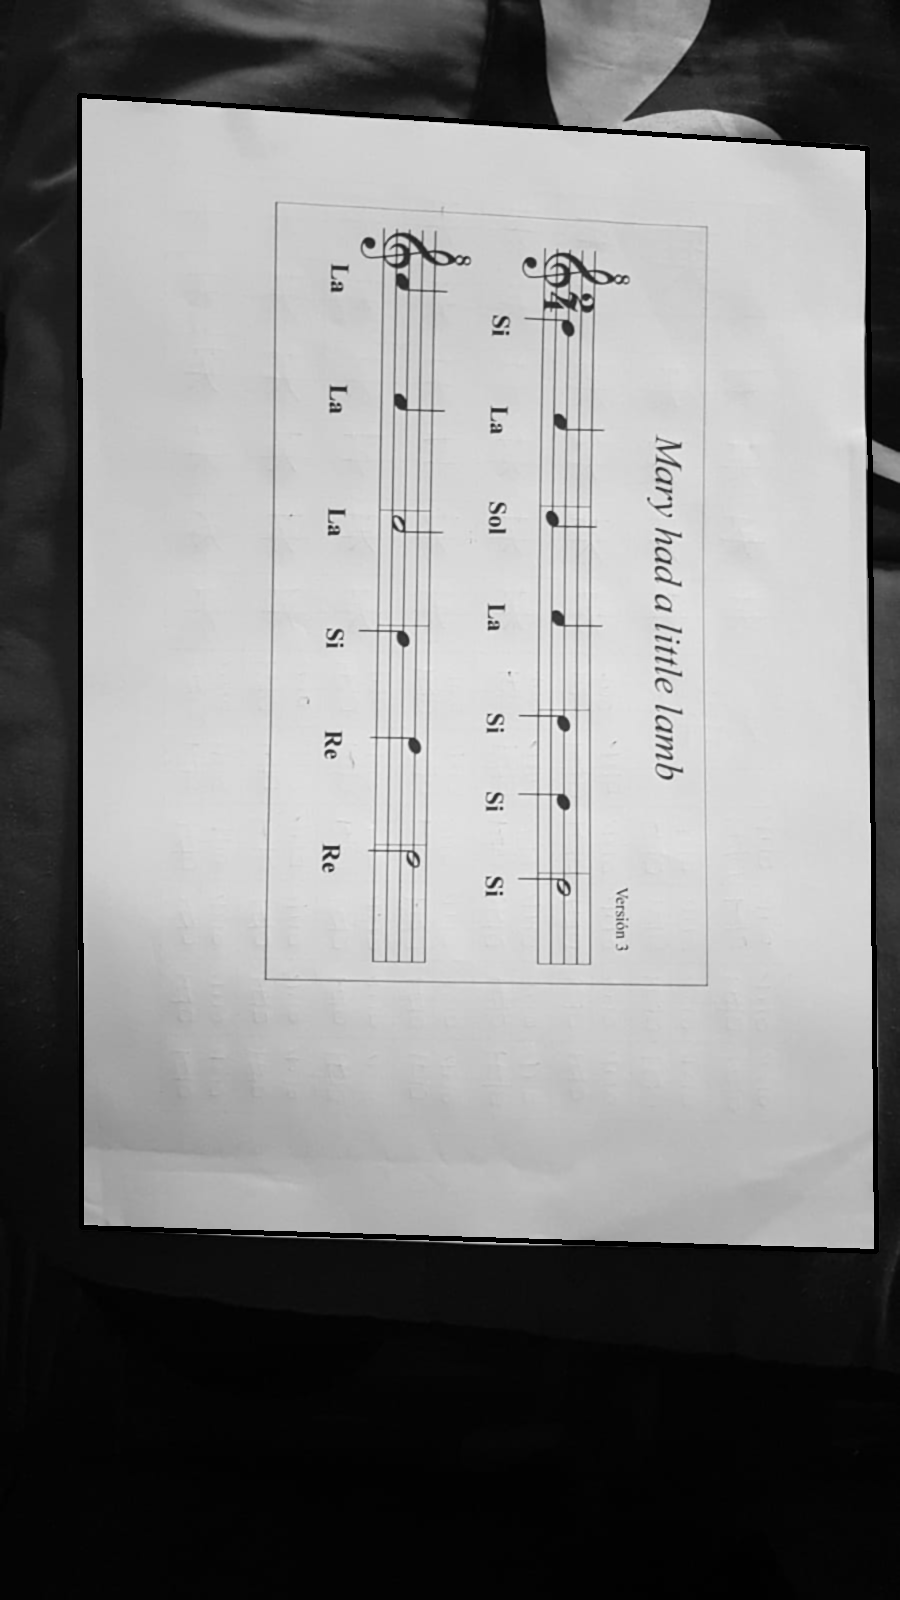

In [22]:
contornos, peri = rectificar(imHoja)

In [23]:
print(peri)
print(imHoja.shape)

3866.8771975040436
(1600, 900, 3)
